# Code for plots

## A) Colors & Style

['#ddf2d8', '#c2e7c0', '#95d6bb', '#61bdcd', '#3597c4', '#0d6dae']

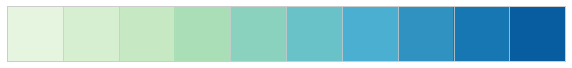

In [385]:
sns.palplot(sns.color_palette("GnBu", 10))
pal = sns.color_palette("GnBu")
pal.as_hex()

In [390]:
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)

<Figure size 432x288 with 0 Axes>

## B) Importing packages

In [1]:
import pandas as pd
df = pd.read_csv('GoMore_Data_DK_270818.csv', sep=',', low_memory=False)

In [2]:
import geopandas as gp #conda install geopandas
from shapely.geometry import Point

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

%matplotlib inline

## 6. Cleaning Data

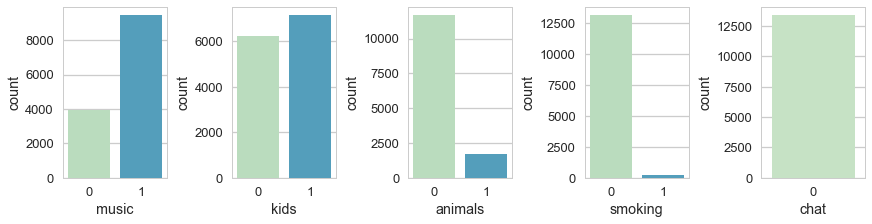

In [391]:
df['chat'] = 0
f, axes = plt.subplots(1, 5, figsize=(12,3), constrained_layout=True)

sns.countplot(x="music", data=df, ax=axes[0], palette='GnBu')
sns.countplot(x="kids", data=df, ax=axes[1], palette='GnBu')
sns.countplot(x="animals", data=df, ax=axes[2], palette='GnBu')
sns.countplot(x="smoking", data=df, ax=axes[3], palette= 'GnBu')
sns.countplot(x="chat", data=df, ax=axes[4], color= '#c2e7c0')

plt.savefig("barplot_descriptive2.png")

### Outlier?


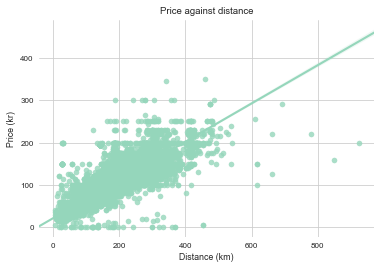

In [470]:
#scatterplot - pris mod distance
fig1 = sns.regplot(x=df['distance_KM'], y=df['price_DKK'], scatter=True, fit_reg=True, order=1, color='#95d6bb')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.set_context('paper')
plt.xlabel('Distance (km)')
plt.ylabel('Price (kr)')
plt.title('Price against distance')
plt.show()
fig = fig1.get_figure()
fig.savefig("scatterplot_outliers.png")

In [382]:
outlier = df['distance_KM'] > 1500000
print(df[outlier]['name_dep'])
print(df[outlier]['name_arr'])

#drop outliers
df = df.drop(df[outlier == True].index)

Series([], Name: name_dep, dtype: object)
Series([], Name: name_arr, dtype: object)


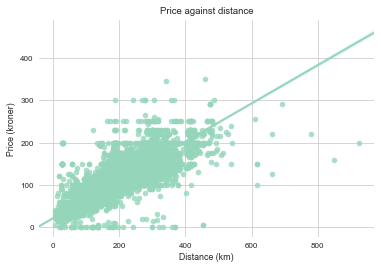

In [471]:
#scatterplot uden outliers
fig_no_outlier = sns.regplot(x=df['distance_KM'], y=df['price_DKK'], scatter=True, fit_reg=True, order=1, color='#95d6bb')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.set_context('paper')
plt.xlabel('Distance (km)')
plt.ylabel('Price (kroner)')
plt.title('Price against distance')
plt.show()
fig = fig_no_outlier.get_figure()
fig.savefig("scatterplot_no_outliers.png")

# 7 Analysis of Data

## 7.1 Who uses GoMore?

## 7.2. Descriptive Analysis

### Price, Distance, Geography and Toll roads - Supplied

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


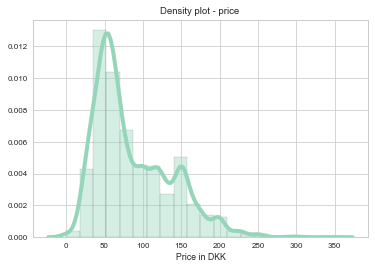

In [472]:
# Density Plot and Histogram of price
sns.distplot(df['price_DKK'], hist=True, kde=True, 
             bins=int(20), color = '#95d6bb', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Price in DKK')
plt.title('Density plot - price ')
plt.savefig('Density_price.png', )

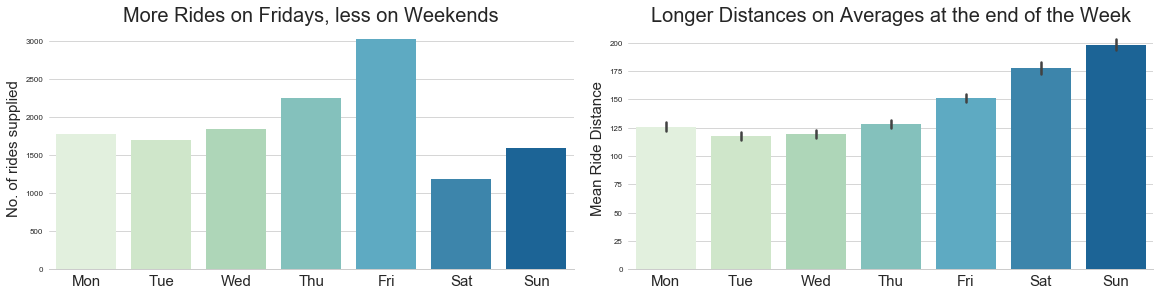

In [473]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,4), constrained_layout=True, sharex=True)
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)
# sns.set_context('talk')

sns.countplot(x = 'weekday', data = df, palette='GnBu', ax=ax0)
ax0.set_ylabel('No. of rides supplied', fontsize=15)
ax0.set_xlabel('')
ax0.set_title('More Rides on Fridays, less on Weekends', fontsize=20)
ax0.set_xticklabels(labels= ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)

sns.barplot(x='weekday', y='distance_KM', data=df, palette='GnBu', ax=ax1)
ax1.set_ylabel('Mean Ride Distance', fontsize=15)
ax1.set_xlabel('')
ax1.set_title('Longer Distances on Averages at the end of the Week', fontsize=20)
ax1.set_xticklabels(labels= ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)

# plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=20)

plt.savefig('distance_weekday_final.png')

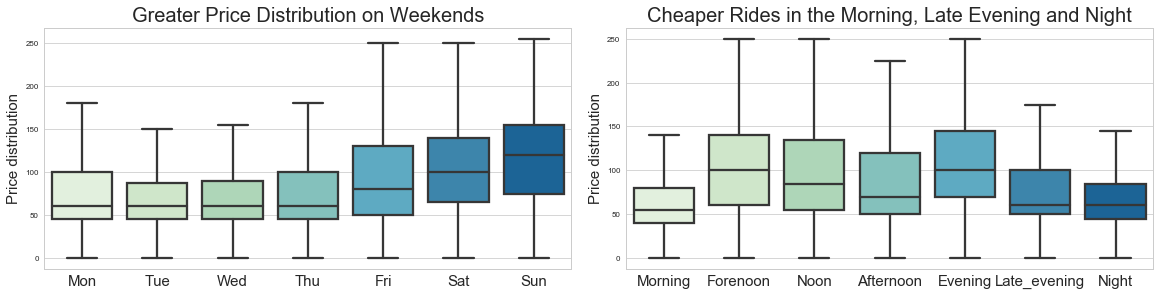

In [474]:
## How does prices vary over days and time of the day?
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,4), constrained_layout=True)
sns.set_context('talk')
sns.boxplot(x = 'weekday', y='price_DKK', data = df, palette='GnBu', ax=ax0, showfliers=False )
ax0.set_ylabel('Price distribution', fontsize=15)
ax0.set_xlabel('')
ax0.set_xticklabels(labels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)
ax0.set_title('Greater Price Distribution on Weekends', fontsize=20)

ord = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night']
sns.boxplot(y='price_DKK', x='time_cat', data=df, order = ord, palette='GnBu', ax=ax1, showfliers=False)
ax1.set_ylabel('Price distribution', fontsize=15)
ax1.set_xlabel('')
ax1.set_xticklabels(labels=('Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night'),fontsize=15)
ax1.set_title('Cheaper Rides in the Morning, Late Evening and Night', fontsize=20)


plt.savefig('pricedistribution_weekdays_and_timecat.png')

In [475]:
df_crosstab = pd.crosstab(df["time_cat"], df["weekday"], values=df["price_DKK"], aggfunc='mean').round(0) 

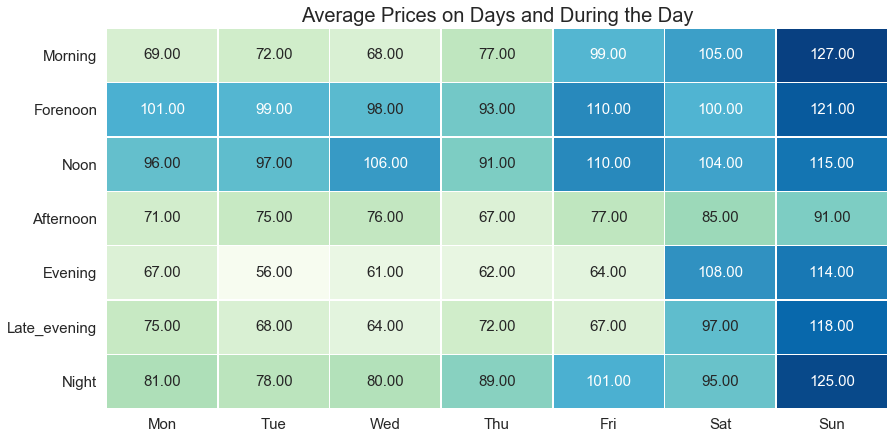

In [476]:
# fig, ax = plt.subplots(figsize=(10,10)
#Heatmap
plt.subplots(figsize=(14,7))
y_names = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night']
x_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(df_crosstab, annot=True, cmap="GnBu", cbar=False, linewidths=.5, fmt='.2f', annot_kws={'size':15}, yticklabels=y_names, xticklabels=x_names)
# sns.set_context('talk')
# plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
# plt.yticks(np.arange(7), ('Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night'))
plt.xlabel('')
plt.ylabel('')
plt.title('Average Prices on Days and During the Day', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("HeatmapWeekdays.png")

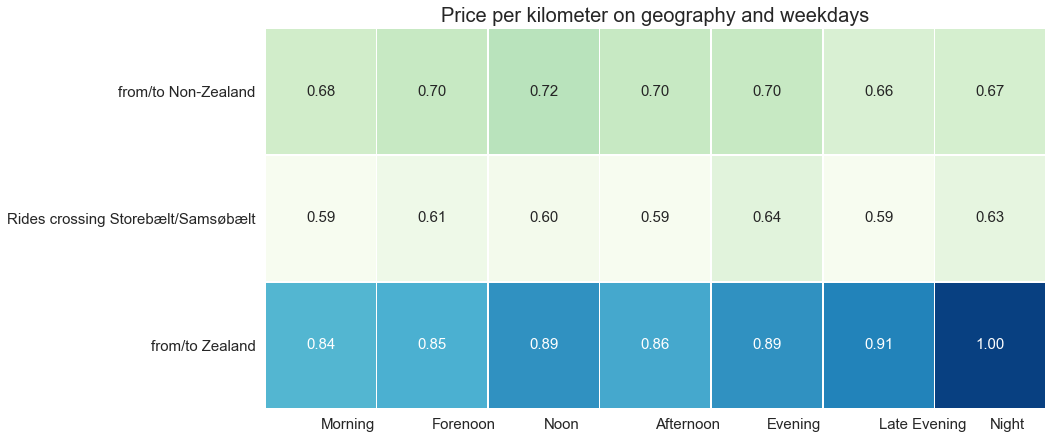

<Figure size 432x288 with 0 Axes>

In [477]:
# Krydstabel: 
df_crosstab = pd.crosstab(df["toll_road"], df["weekday"], values=df["DKK_per_KM"], aggfunc='mean').round(2) 

#Heatmap
plt.subplots(figsize=(14,7))
x_names = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late Evening', 'Night']
y_names = ['from/to Non-Zealand', 'Rides crossing Storebælt/Samsøbælt', 'from/to Zealand']
sns.heatmap(df_crosstab, annot=True, cmap="GnBu", cbar=False,
            fmt='.2f', annot_kws={'size':15}, linewidths=.5, yticklabels=y_names, xticklabels=x_names)
plt.xticks(ha='left', fontsize=15)
# labels = ['from/to Non-Zealand', 'Rides crossing Storebælt/Samsøbælt', 'from/to Zealand']
plt.yticks(fontsize=15)  #rotation='horizontal'
plt.xticks(fontsize=15)
plt.title('Price per kilometer on geography and weekdays', fontsize=20)
plt.xlabel('')
plt.ylabel('')

# # Shift ticks to be at 0.5, 1.5, etc
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set(ticks=np.arange(0.5, len(labels)), ticklabels=labels)

plt.show()

plt.savefig("HeatmapBetalingsvej_Weekday.png")

### Efterspørgslen - Seats og taken seats
Hvordan varierer efterspørgslen over dage og tid? Kan dette ses i prisen

In [158]:
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [232]:
df.groupby('weekday').sum()

,id,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,flex_booking,...,time_minute,time_minute_hour,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,chat
weekday,,,,,,,,,,,,,,,,,,,,,
0,13145550529,5094,4082,1704542090,22250.0,178000,6.0,1774.0,1110.0,1264.0,...,30150,20498.500000,167,655,127,229,464,109,29,0
1,12578730027,4813,3967,1664055645,21275.0,170210,1.0,1702.0,1059.0,1248.0,...,28932,20118.200000,139,572,144,246,471,96,35,0
2,13642998963,5272,4313,1801175729,23087.5,184700,3.0,1844.0,1185.0,1316.0,...,32849,21888.483333,137,639,158,258,498,117,40,0
3,16665161779,6389,5121,2201388909,28187.5,225510,6.0,2250.0,1447.0,1650.0,...,37335,27545.250000,155,689,218,363,632,147,52,0
4,22363227757,8441,6059,2780185553,37835.0,302610,9.0,3018.0,1909.0,2199.0,...,50277,39664.950000,131,638,307,792,897,203,59,0
5,8802742440,3257,2245,968259671,14885.0,119020,9.0,1183.0,741.0,841.0,...,17219,14799.983333,39,296,323,211,178,103,42,0
6,11784993647,4389,2545,1261120688,19935.0,159420,4.0,1592.0,958.0,1122.0,...,21319,23237.316667,25,170,306,345,374,332,44,0


In [235]:
freeseats_summed = df.groupby('weekday').sum().iloc[:,2] 
# df.groupby('weekday').sum().iloc[:,2] 

weekday
0    4082
1    3967
2    4313
3    5121
4    6059
5    2245
6    2545
Name: free_seats, dtype: int64

In [249]:
takenseats_summed = df.groupby('weekday').sum().iloc[:,40]

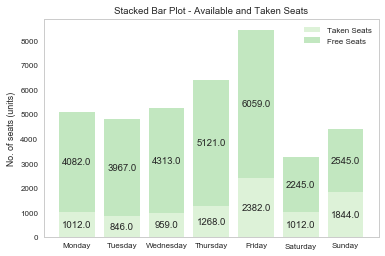

In [281]:
plt.figure(figsize=(6, 4))
sns.set_context('paper')
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)
series_labels = ['Taken Seats', 'Free Seats']

data = [
    takenseats_summed,
    freeseats_summed
]

category_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True,
    value_format="{:.1f}",
    y_label="No. of seats (units)"
)
plt.title('Stacked Bar Plot - Available and Taken Seats')
plt.savefig('stackedbarplot.png')
plt.show()

### Stacked bar plot for driven rides

In [ ]:
driven_rides = df[df['date'] <  '2018-08-23']
# driven_rides.groupby('date').count()

In [277]:
driven_freeseats_summed = driven_rides.groupby('weekday').sum().iloc[:,2] 

In [274]:
driven_takenseats_summed = driven_rides.groupby('weekday').sum().iloc[:,40]

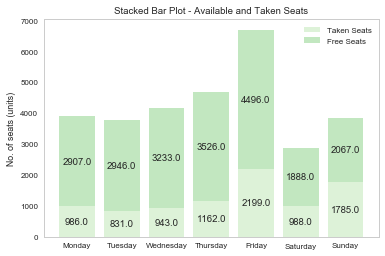

In [378]:
a = plt.figure(figsize=(6, 4))
sns.set_context('paper')
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)
series_labels = ['Taken Seats', 'Free Seats']

data = [
    driven_takenseats_summed,
    driven_freeseats_summed
]

category_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True,
    value_format="{:.1f}",
    y_label="No. of seats (units)"
)
plt.title('Stacked Bar Plot - Available and Taken Seats')
plt.savefig('stackedbarplot_drivenRides.png')
plt.show()

### Påvirkes prisen af nogle af det andre kategorisk variable - kids, music, smoking, flexbooking og quickbooking og detour\_pref

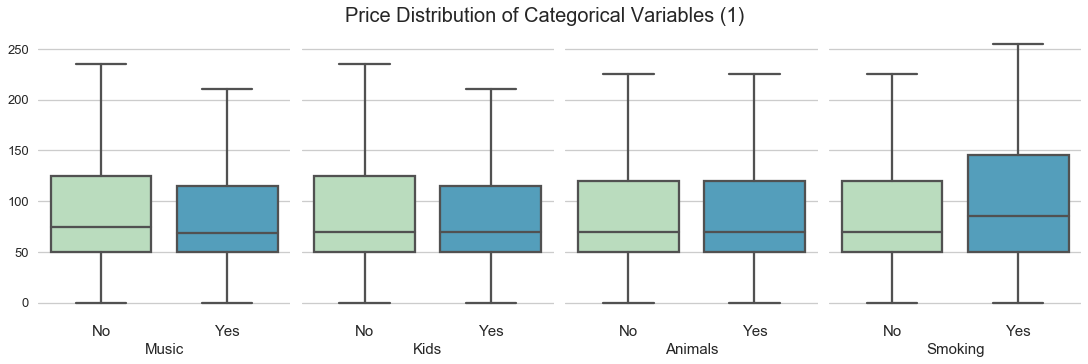

In [374]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,5), constrained_layout=True, sharey=True)
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.boxplot(x="music", y='price_DKK', data=df, ax=ax0, palette='GnBu', showfliers=False)
sns.boxplot(x="kids",  y='price_DKK', data=df, ax=ax1, palette='GnBu', showfliers=False)
sns.boxplot(x="animals",  y='price_DKK', data=df, ax=ax2, palette='GnBu', showfliers=False)
sns.boxplot(x="smoking",  y='price_DKK', data=df, ax=ax3, palette= 'GnBu', showfliers=False)

ax0.set_ylabel('')
ax0.set_xlabel('Music', fontsize=15)
ax0.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax1.set_ylabel('')
ax1.set_xlabel('Kids', fontsize=15)
ax1.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax2.set_ylabel('')
ax2.set_xlabel('Animals', fontsize=15)
ax2.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax3.set_ylabel('')
ax3.set_xlabel('Smoking', fontsize=15)
ax3.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

f.suptitle('Price Distribution of Categorical Variables (1)', fontsize=20)
plt.savefig("boxplot_categorical_smokingKids.png")

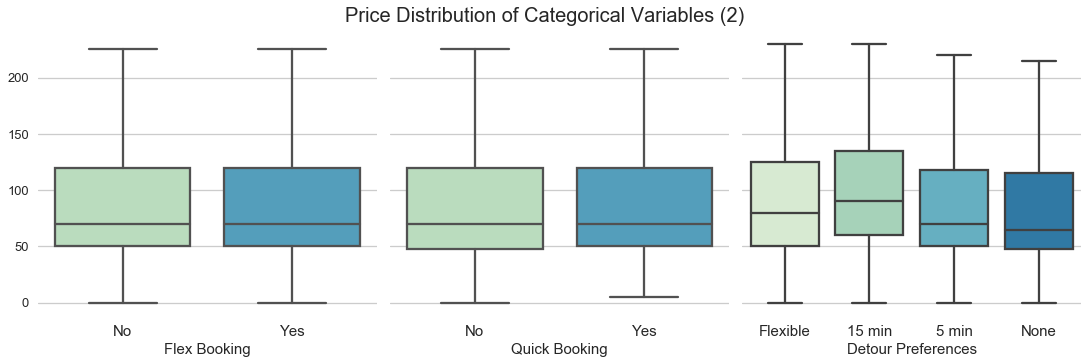

In [377]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, sharey=True)
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.boxplot(x='flex_booking', y='price_DKK', data=df, ax=ax0, palette='GnBu', showfliers=False)
sns.boxplot(x='quick_booking', y='price_DKK', data=df, ax=ax1, palette='GnBu', showfliers=False)
order_pref = ['flexible', '15_minutes', '5_minutes', 'none']
sns.boxplot(x='detour_preference', y='price_DKK', data=df, ax=ax2, palette='GnBu', showfliers=False, order=order_pref)

ax0.set_ylabel('')
ax0.set_xlabel('Flex Booking', fontsize=15)
ax0.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax1.set_ylabel('')
ax1.set_xlabel('Quick Booking', fontsize=15)
ax1.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax2.set_ylabel('')
ax2.set_xlabel('Detour Preferences', fontsize=15)
ax2.set_xticklabels(labels=('Flexible', '15 min','5 min','None'), fontsize=15)

f.suptitle('Price Distribution of Categorical Variables (2)', fontsize=20)
plt.savefig("boxplot_categorical_booking.png")

### Scatter

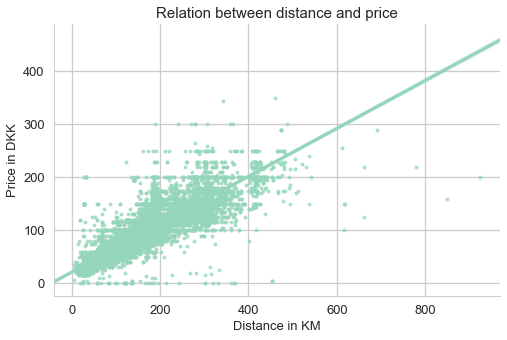

In [450]:
# use the function regplot to make a scatterplot
plt.subplots(ncols=1, figsize=(8,5))
sns.regplot(x=df["distance_KM"], y=df["price_DKK"], color = '#95d6bb', marker='o', scatter_kws={'s':15})
sns.despine(left= False, right=True, bottom=False, top=True)
plt.xlabel('Distance in KM', fontsize=13)
plt.ylabel('Price in DKK', fontsize=13)
plt.title('Relation between distance and price', fontsize=15)

plt.savefig('regression_distance_price.png')

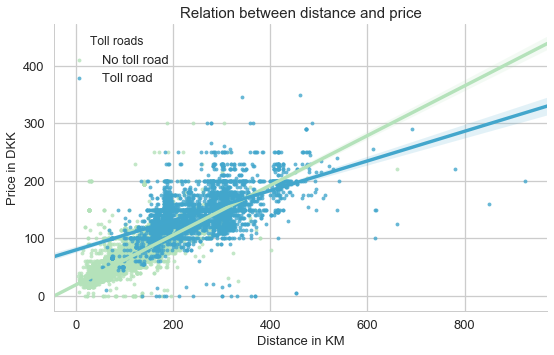

In [451]:
#Lmplot to show the relation with and without toll
g = sns.lmplot(x="distance_KM", y="price_DKK", data=df, palette='GnBu' , 
           scatter_kws={"s": 15}, ci=99, hue='toll_road_bool', size=5, aspect=1.6,
          legend_out=False)
sns.despine(left= False, right=True, bottom=False, top=True)
plt.xlabel('Distance in KM', fontsize=13)
plt.ylabel('Price in DKK', fontsize=13)
plt.title('Relation between distance and price', fontsize=15)
leg = g.axes.flat[0].get_legend()
new_title = 'Toll roads'
leg.set_title(new_title)
new_labels = ['No toll road', 'Toll road']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.savefig('regression_distance_price_toll.png')